In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Fdata = pd.read_csv('fishdata.csv')

In [3]:
Fdata

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,external temp,humidity,internal temperature
0,6.0,18.0,14.0,30.0,43.0,201.0,25.0,29.0,95.00,27.19,4.39
1,6.0,18.0,14.0,30.0,48.0,201.0,25.0,29.0,95.00,27.19,4.38
2,6.0,18.0,14.0,31.0,3.0,201.0,25.0,29.0,95.00,27.19,4.38
3,6.0,18.0,14.0,31.0,8.0,201.0,25.0,29.0,95.00,27.19,4.41
4,6.0,18.0,14.0,31.0,13.0,201.0,25.0,29.0,95.00,27.25,4.41
...,...,...,...,...,...,...,...,...,...,...,...
811941,10.0,19.0,8.0,24.0,4.0,201.0,-165.0,25.0,95.00,25.94,4.17
811942,10.0,19.0,8.0,24.0,8.0,201.0,-167.0,25.0,95.00,25.94,4.19
811943,10.0,19.0,8.0,24.0,13.0,-168.0,25.0,95.0,25.94,4.18,NaN
811944,10.0,19.0,8.0,24.0,16.0,201.0,-169.0,25.0,95.00,25.94,4.17


In [4]:
Fdata.dtypes

Month                   float64
Day                     float64
Hour                    float64
Minute                  float64
Second                  float64
Carbon Monoxide         float64
external temperature    float64
PM 2.5                  float64
external temp           float64
humidity                float64
internal temperature    float64
dtype: object

In [5]:
Fdata[:].isnull().sum()

Month                      3
Day                        3
Hour                       3
Minute                     3
Second                     3
Carbon Monoxide         1751
external temperature      74
PM 2.5                    95
external temp            103
humidity                 103
internal temperature    4538
dtype: int64

In [6]:
Fdata_LD = Fdata

In [7]:
Fdata_LD.dropna()

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,external temp,humidity,internal temperature
0,6.0,18.0,14.0,30.0,43.0,201.0,25.0,29.0,95.0,27.19,4.39
1,6.0,18.0,14.0,30.0,48.0,201.0,25.0,29.0,95.0,27.19,4.38
2,6.0,18.0,14.0,31.0,3.0,201.0,25.0,29.0,95.0,27.19,4.38
3,6.0,18.0,14.0,31.0,8.0,201.0,25.0,29.0,95.0,27.19,4.41
4,6.0,18.0,14.0,31.0,13.0,201.0,25.0,29.0,95.0,27.25,4.41
...,...,...,...,...,...,...,...,...,...,...,...
811940,10.0,19.0,8.0,24.0,0.0,201.0,-165.0,25.0,95.0,25.94,4.18
811941,10.0,19.0,8.0,24.0,4.0,201.0,-165.0,25.0,95.0,25.94,4.17
811942,10.0,19.0,8.0,24.0,8.0,201.0,-167.0,25.0,95.0,25.94,4.19
811944,10.0,19.0,8.0,24.0,16.0,201.0,-169.0,25.0,95.0,25.94,4.17


In [8]:
#clear incorrect month colume (month range = 1 to 12)
Fdata_LD.drop(Fdata_LD[Fdata_LD['Month'] < 0].index, inplace = True)
Fdata_LD.drop(Fdata_LD[Fdata_LD['Month'] > 12].index, inplace = True)

In [9]:
#clear incorrect external temperature (negetive number)
Fdata_LD.drop(Fdata_LD[Fdata_LD['external temperature'] <0].index, inplace = True)

In [10]:
#clear incorrect internal temperature (abnormal number)
Fdata_LD.drop(Fdata_LD[Fdata_LD['internal temperature'] >97.47].index, inplace = True)

In [11]:
Fdata_LD.describe()

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,external temp,humidity,internal temperature
count,110404.000000,110404.000000,110404.000000,110404.000000,110404.000000,110130.000000,110382.000000,110361.000000,110353.000000,110353.000000,105918.000000
mean,7.144297,19.208271,11.565215,29.815740,29.523689,179.921385,28.977115,32.535649,92.315057,26.533557,3.977448
std,0.612602,9.037784,3.459116,17.335512,17.316008,45.122820,12.491814,12.834805,13.126737,4.747268,0.192255
min,2.000000,1.000000,0.000000,0.000000,0.000000,-183.000000,0.000000,4.250000,25.440000,2.970000,3.202000
25%,7.000000,15.000000,9.000000,15.000000,14.000000,171.000000,21.000000,29.000000,95.000000,26.620000,3.830000
50%,7.000000,19.000000,12.000000,30.000000,29.000000,183.000000,31.000000,30.000000,95.000000,27.250000,3.930000
75%,7.000000,29.000000,14.000000,45.000000,44.000000,200.000000,39.000000,30.000000,95.000000,27.810000,4.090000
max,10.000000,31.000000,95.000000,59.000000,59.000000,278.000000,77.000000,95.000000,95.000000,31.870000,5.080000


In [12]:
FISH_PIVOT = Fdata_LD.groupby(['Month'])['external temperature','humidity','Carbon Monoxide'].mean().reset_index()

<ipython-input-12-75511096a6f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FISH_PIVOT = Fdata_LD.groupby(['Month'])['external temperature','humidity','Carbon Monoxide'].mean().reset_index()


In [13]:
FISH_PIVOT.set_index("Month", inplace = True)

In [14]:
FISH_PIVOT

,external temperature,humidity,Carbon Monoxide
Month,,,
2.0,NaN,NaN,NaN
6.0,27.526405,27.874710,209.888523
7.0,28.949868,26.893059,178.963987
8.0,29.789261,26.233552,176.673568
9.0,28.693994,3.983003,49.961868
10.0,27.931959,3.996701,62.459794


<AxesSubplot:xlabel='Month'>

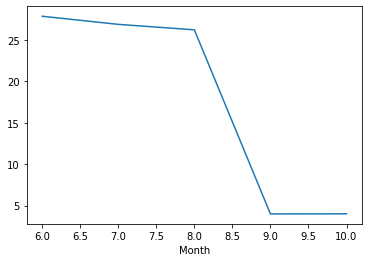

In [15]:
FISH_PIVOT['humidity'].plot()

In [16]:
Fdata_LD['Humidity levels'] = pd.qcut(Fdata['humidity'], q=3)

In [17]:
Fdata_LD

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,external temp,humidity,internal temperature,Humidity levels
0,6.0,18.0,14.0,30.0,43.0,201.0,25.0,29.0,95.00,27.19,4.39,"(26.81, 27.44]"
1,6.0,18.0,14.0,30.0,48.0,201.0,25.0,29.0,95.00,27.19,4.38,"(26.81, 27.44]"
2,6.0,18.0,14.0,31.0,3.0,201.0,25.0,29.0,95.00,27.19,4.38,"(26.81, 27.44]"
3,6.0,18.0,14.0,31.0,8.0,201.0,25.0,29.0,95.00,27.19,4.41,"(26.81, 27.44]"
4,6.0,18.0,14.0,31.0,13.0,201.0,25.0,29.0,95.00,27.25,4.41,"(26.81, 27.44]"
...,...,...,...,...,...,...,...,...,...,...,...,...
811607,10.0,17.0,13.0,29.0,18.0,-155.0,31.0,95.0,29.06,4.08,NaN,"(2.9690000000000003, 26.81]"
811676,10.0,17.0,13.0,34.0,39.0,-155.0,31.0,95.0,29.06,4.08,NaN,"(2.9690000000000003, 26.81]"
811757,10.0,17.0,13.0,40.0,53.0,155.0,31.0,95.0,29.06,4.08,NaN,"(2.9690000000000003, 26.81]"
811840,10.0,19.0,8.0,16.0,34.0,-164.0,26.0,95.0,26.06,4.21,NaN,"(2.9690000000000003, 26.81]"


In [19]:
Fdata_LD['Humidity levels'].value_counts()

(2.9690000000000003, 26.81]    40628
(27.44, 31.87]                 36429
(26.81, 27.44]                 33296
Name: Humidity levels, dtype: int64

In [22]:
Humidity_binof3 = ['low', 'medium', 'high']
Fdata_LD['Humidity rank'] = pd.qcut(Fdata['humidity'], q=3, labels=Humidity_binof3)

In [23]:
Fdata_LD

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,external temp,humidity,internal temperature,Humidity levels,Humidity rank
0,6.0,18.0,14.0,30.0,43.0,201.0,25.0,29.0,95.00,27.19,4.39,"(26.81, 27.44]",medium
1,6.0,18.0,14.0,30.0,48.0,201.0,25.0,29.0,95.00,27.19,4.38,"(26.81, 27.44]",medium
2,6.0,18.0,14.0,31.0,3.0,201.0,25.0,29.0,95.00,27.19,4.38,"(26.81, 27.44]",medium
3,6.0,18.0,14.0,31.0,8.0,201.0,25.0,29.0,95.00,27.19,4.41,"(26.81, 27.44]",medium
4,6.0,18.0,14.0,31.0,13.0,201.0,25.0,29.0,95.00,27.25,4.41,"(26.81, 27.44]",medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811607,10.0,17.0,13.0,29.0,18.0,-155.0,31.0,95.0,29.06,4.08,NaN,"(2.9690000000000003, 26.81]",low
811676,10.0,17.0,13.0,34.0,39.0,-155.0,31.0,95.0,29.06,4.08,NaN,"(2.9690000000000003, 26.81]",low
811757,10.0,17.0,13.0,40.0,53.0,155.0,31.0,95.0,29.06,4.08,NaN,"(2.9690000000000003, 26.81]",low
811840,10.0,19.0,8.0,16.0,34.0,-164.0,26.0,95.0,26.06,4.21,NaN,"(2.9690000000000003, 26.81]",low


In [24]:
Fdata_LD['Humidity rank'].value_counts()

low       40628
high      36429
medium    33296
Name: Humidity rank, dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

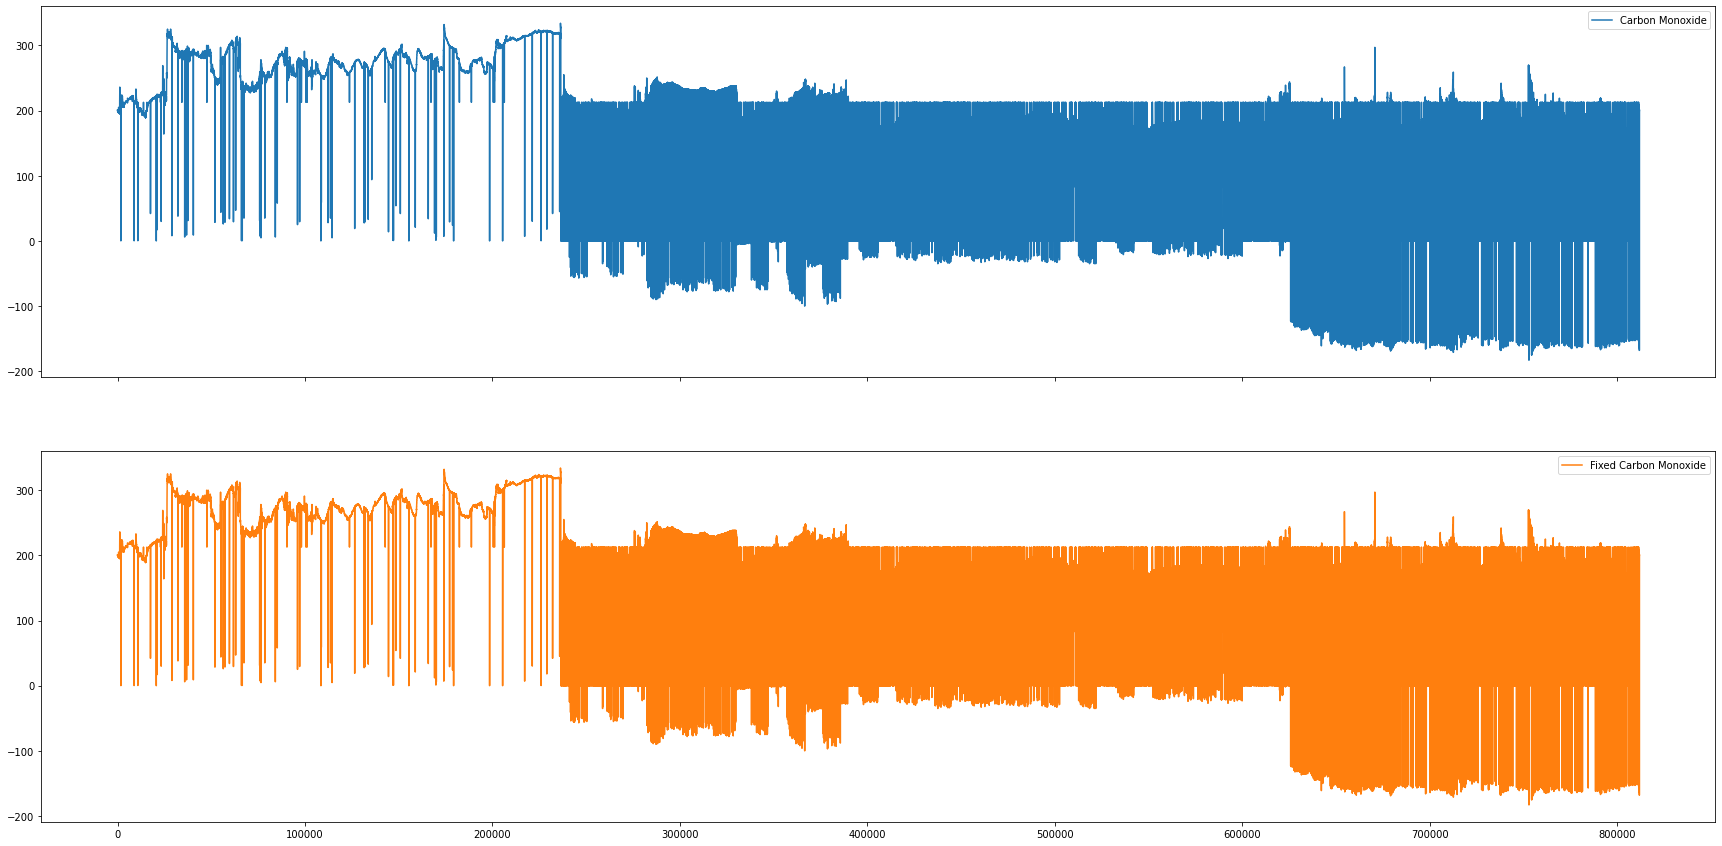

In [21]:
uncleanCarbon = pd.DataFrame()
cleanedCarbon = pd.DataFrame()
uncleanCarbon=Fdata_LD['Carbon Monoxide']
cleanedCarbon=Fdata['Carbon Monoxide']
CarbonCompare_deleteMissing = pd.concat([uncleanCarbon, cleanedCarbon], axis=1)
CarbonCompare_deleteMissing.columns = ['Carbon Monoxide','Fixed Carbon Monoxide']
CarbonCompare_deleteMissing.plot(figsize=(30,15),use_index=True, subplots=bool)

In [18]:
Fdata_AIM = Fdata
Fdata_AIM.mean()
Fdata_AIM.fillna(Fdata_AIM.mean(), inplace=True)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

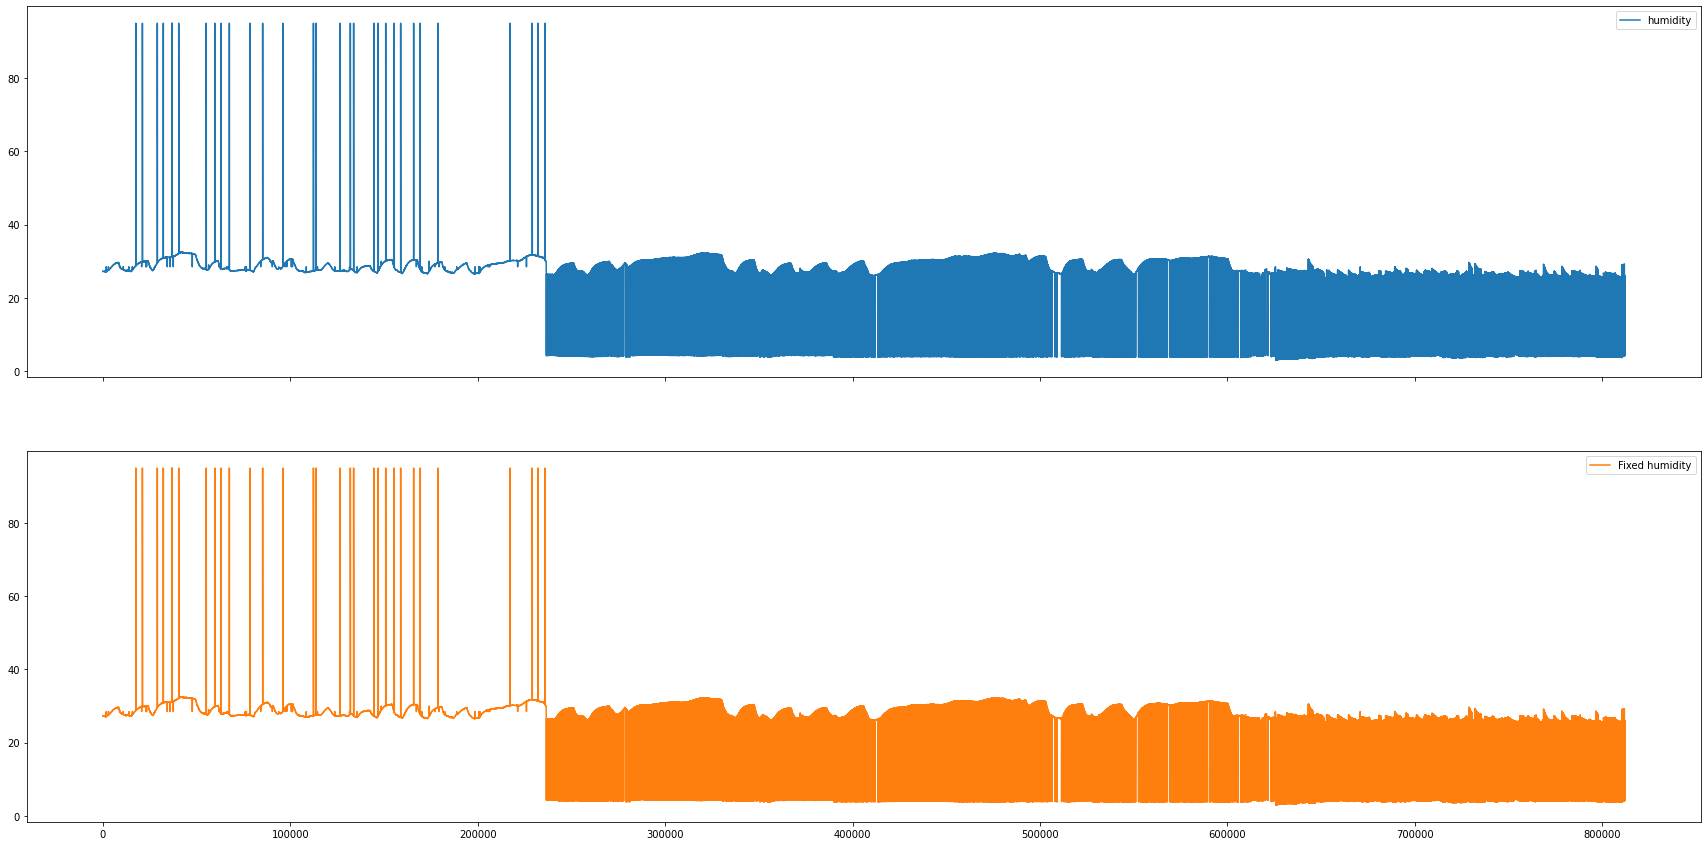

In [22]:
uncleanCarbon = pd.DataFrame()
cleanedCarbon = pd.DataFrame()
unclean_humidity=Fdata_AIM['humidity']
cleaned_humidity=Fdata['humidity']
CarbonCompare_fillAverage = pd.concat([unclean_humidity, cleaned_humidity], axis=1)
CarbonCompare_fillAverage.columns = ['humidity','Fixed humidity']
CarbonCompare_fillAverage.plot(figsize=(30,15),use_index=True,subplots=bool)

In [14]:
Fdata_EG = Fdata
Fdata_EG.interpolate(method='nearest')

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,external temp,humidity,internal temperature
0,6.0,18.0,14.0,30.0,43.0,201.0,25.0,29.0,95.00,27.19,4.39000
1,6.0,18.0,14.0,30.0,48.0,201.0,25.0,29.0,95.00,27.19,4.38000
2,6.0,18.0,14.0,31.0,3.0,201.0,25.0,29.0,95.00,27.19,4.38000
3,6.0,18.0,14.0,31.0,8.0,201.0,25.0,29.0,95.00,27.19,4.41000
4,6.0,18.0,14.0,31.0,13.0,201.0,25.0,29.0,95.00,27.25,4.41000
...,...,...,...,...,...,...,...,...,...,...,...
811941,10.0,19.0,8.0,24.0,4.0,201.0,-165.0,25.0,95.00,25.94,4.17000
811942,10.0,19.0,8.0,24.0,8.0,201.0,-167.0,25.0,95.00,25.94,4.19000
811943,10.0,19.0,8.0,24.0,13.0,-168.0,25.0,95.0,25.94,4.18,82.74487
811944,10.0,19.0,8.0,24.0,16.0,201.0,-169.0,25.0,95.00,25.94,4.17000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

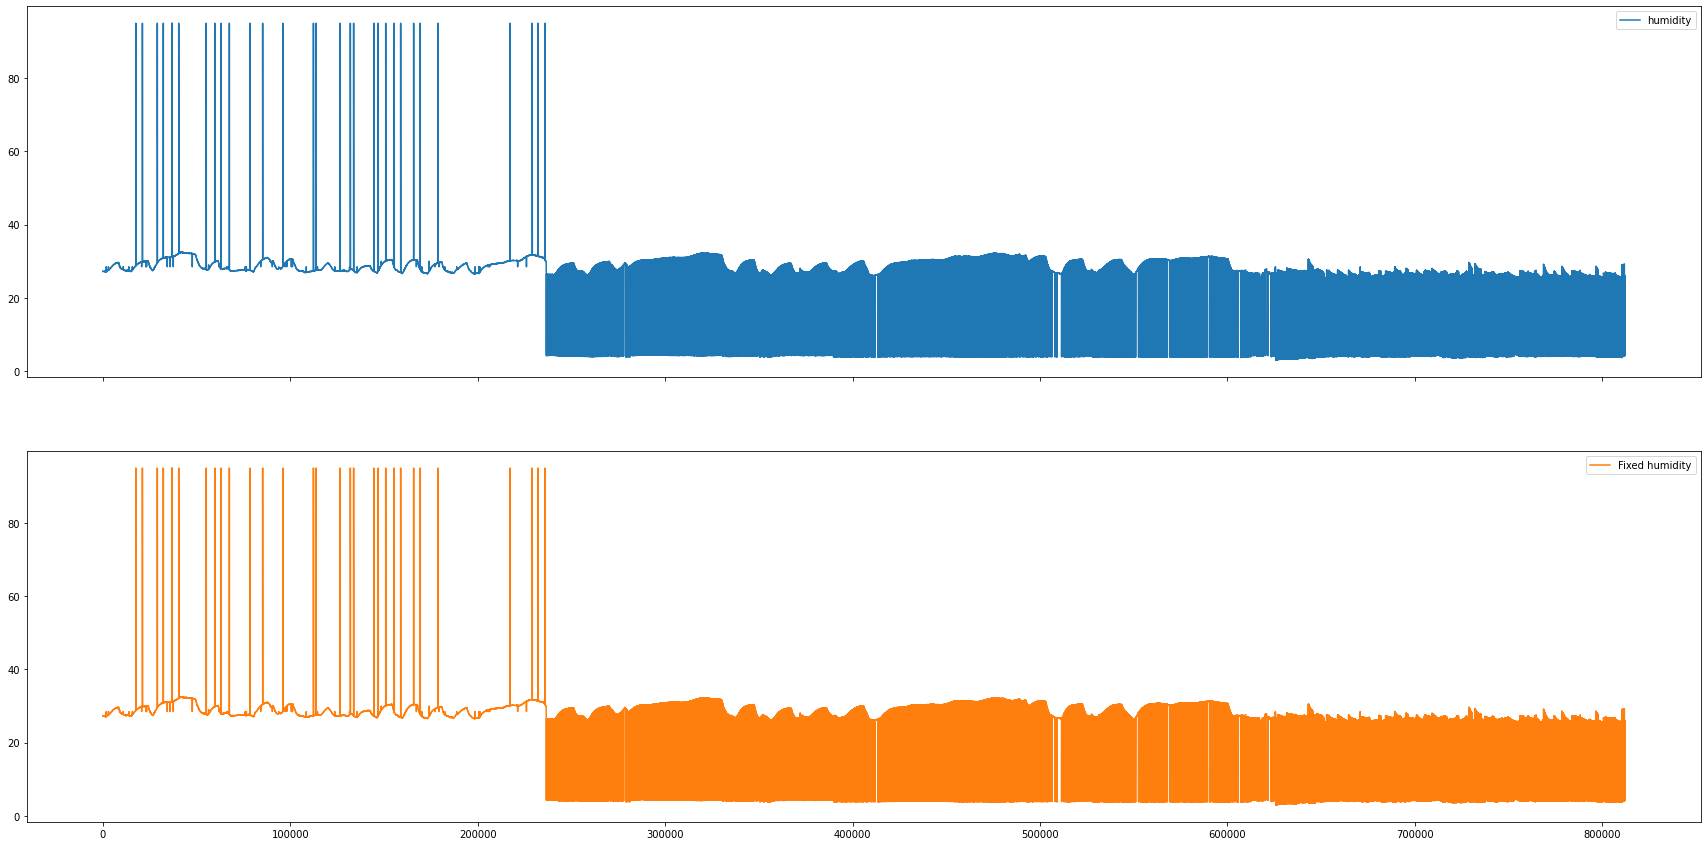

In [23]:
uncleanCarbon = pd.DataFrame()
cleanedCarbon = pd.DataFrame()
unclean_humidity=Fdata_EG['humidity']
cleaned_humidity=Fdata['humidity']
CarbonCompare_FillNearestValue= pd.concat([unclean_humidity, cleaned_humidity], axis=1)
CarbonCompare_FillNearestValue.columns = ['humidity','Fixed humidity']
CarbonCompare_FillNearestValue.plot(figsize=(30,15),use_index=True,subplots=bool)